In [68]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import json
import tifffile as tiff

In [69]:
val = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/results_IMMUcan/test_results_fold_0.csv")
df = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv")

In [67]:
print(df)

             MPO  HistoneH3       SMA      CD16      CD38     HLADR      CD27  \
0       0.000000   1.819988  0.502650  1.265410  0.515007  3.331261  0.403800   
1       0.196983   2.541684  1.247892  0.161012  1.071582  0.414533  0.735485   
2       0.135920   2.393087  1.136961  0.505529  0.605836  0.710857  0.419814   
3       0.210604   2.301097  0.858570  0.422594  0.731755  1.433206  0.373062   
4       0.165905   2.244917  1.396334  1.744382  0.458541  4.006500  0.003607   
...          ...        ...       ...       ...       ...       ...       ...   
457112  0.342312   5.248389  3.919117  2.144037  1.008428  1.917531  1.592820   
457113  0.110884   3.520289  0.310834  2.590231  2.336469  3.652604  1.443007   
457114  0.150941   4.214958  2.651646  0.807826  0.403674  1.226701  0.400776   
457115  0.203716   6.014126  2.757555  2.679402  1.482629  2.401113  1.907091   
457116  0.490591   5.822348  1.615410  2.266402  1.272588  1.986723  2.076126   

            CD15    CD45RA 

In [70]:
df['cell_id'].min()

1

In [83]:
val

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,13,0.502796,2,1,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.11130047589540482, 0.013668922707438469, 0....",CD4+_T_cell
1,1,0,0.565678,1,2,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.5656783580780029, 0.08513420820236206, 0.03...",BnT
2,2,12,0.499518,3,3,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00025761782308109105, 0.2238914668560028, 0...",CD8+_T_cell
3,3,12,0.410514,1,4,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0027973782271146774, 0.312889039516449, 0.0...",BnT
4,4,1,0.547875,1,5,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0005109531339257956, 0.5478748083114624, 0....",BnT
...,...,...,...,...,...,...,...,...
61340,61340,11,0.193588,6,1552,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.000655223208013922, 0.003357506589964032, 0...",M2_Macrophage
61341,61341,11,0.331927,-1,1553,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0018323981203138828, 0.004941307473927736, ...",NaN
61342,61342,11,0.257110,11,1554,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.004029169678688049, 0.0027886582538485527, ...",Stroma
61343,61343,8,0.520409,13,1555,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.00019418471492826939, 0.0004792933468706906...",undefined


In [65]:
val[val['image_id'] =='IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004']

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,1,0.885264,2,178,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.006423568353056908, 0.8852642178535461, 0.0...",CD4+_T_cell
1,1,1,0.344146,12,189,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.07360406965017319, 0.3441455364227295, 0.34...",Treg
2,2,2,0.389348,3,193,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.18689057230949402, 0.17617526650428772, 0.3...",CD8+_T_cell
3,3,13,0.485770,1,194,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.03997499495744705, 0.23141250014305115, 0.0...",BnT
4,4,1,0.345746,8,195,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.2125581055879593, 0.34574562311172485, 0.09...",Neutrophil
...,...,...,...,...,...,...,...,...
3052,3052,9,0.206412,6,3462,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.18172113597393036, 0.13878124952316284, 0.0...",M2_Macrophage
3053,3053,1,0.322934,13,3463,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.2886584997177124, 0.3229341208934784, 0.028...",undefined
3054,3054,2,0.328403,12,3466,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.004262538626790047, 0.04205607995390892, 0....",Treg
3055,3055,0,0.360815,6,3467,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.36081549525260925, 0.10419492423534393, 0.0...",M2_Macrophage


In [71]:
print(val[val['image_id'] =='IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002'])

       Unnamed: 0  pred  pred_prob  label  cell_id  \
59789       59789    13   0.329625     13        1   
59790       59790     8   0.215469      4        2   
59791       59791     4   0.296703      2        3   
59792       59792     8   0.290961     13        4   
59793       59793    13   0.369665      8        5   
...           ...   ...        ...    ...      ...   
61340       61340    11   0.193588      6     1552   
61341       61341    11   0.331927     -1     1553   
61342       61342    11   0.257110     11     1554   
61343       61343     8   0.520409     13     1555   
61344       61344     8   0.714776      4     1556   

                                                image_id  \
59789  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
59790  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
59791  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
59792  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...   
59793  IMMUcan_WFLOW_Batch20210304_10067564-SPECT-V

In [54]:
val[val['image_id'] =='IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR-TIS-01-IMC-01_002']

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
76996,76996,11,0.356916,4,64,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.014988904818892479, 0.002143549034371972, 0...",Cancer
76997,76997,3,0.420834,4,65,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0012957882136106491, 0.002356691984459758, ...",Cancer
76998,76998,7,0.555716,8,66,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.02458120882511139, 0.006329241208732128, 0....",Neutrophil
76999,76999,13,0.613147,11,68,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0029422880616039038, 0.0010688903275877237,...",Stroma
77000,77000,13,0.390795,4,69,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.041780609637498856, 0.015601785853505135, 0...",Cancer
...,...,...,...,...,...,...,...,...
78244,78244,13,0.726025,4,1462,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.019341057166457176, 0.018947279080748558, 0...",Cancer
78245,78245,13,0.853395,4,1463,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.02586464025080204, 0.014387899078428745, 0....",Cancer
78246,78246,13,0.891370,4,1464,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.01647784374654293, 0.04441659152507782, 0.0...",Cancer
78247,78247,13,0.428378,4,1465,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0009963089833036065, 0.033678606152534485, ...",Cancer


<Axes: ylabel='Frequency'>

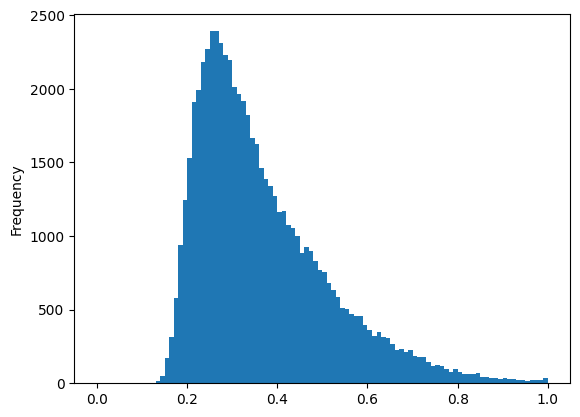

In [72]:
val['pred_prob'].plot.hist(bins=100, range=(0, 1))

In [73]:
with open("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/results_IMMUcan/label_mapping.json") as f:
    mapping = json.load(f)

In [74]:
inv_mapping = {v: k for k, v in mapping.items()}

In [75]:
val['predicted_phenotype'] = val['label'].map(inv_mapping)

In [ ]:
mapping

In [76]:
print(val)

       Unnamed: 0  pred  pred_prob  label  cell_id  \
0               0    13   0.502796      2        1   
1               1     0   0.565678      1        2   
2               2    12   0.499518      3        3   
3               3    12   0.410514      1        4   
4               4     1   0.547875      1        5   
...           ...   ...        ...    ...      ...   
61340       61340    11   0.193588      6     1552   
61341       61341    11   0.331927     -1     1553   
61342       61342    11   0.257110     11     1554   
61343       61343     8   0.520409     13     1555   
61344       61344     8   0.714776      4     1556   

                                                image_id  \
0      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
1      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
2      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
3      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...   
4      IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-

In [11]:
val['label'].value_counts()

label
 4     36232
 11     7884
 3      6988
 2      4630
 1      4221
 6      4161
 13     2989
 0      2741
 9      2128
 12     1855
 5      1568
 8      1513
 10      481
-1       464
 7       394
Name: count, dtype: int64

In [12]:
val['predicted_phenotype'].value_counts()

predicted_phenotype
Cancer                         36232
Stroma                          7884
CD8+_T_cell                     6988
CD4+_T_cell                     4630
BnT                             4221
M2_Macrophage                   4161
undefined                       2989
B_cell                          2741
Plasma_cell                     2128
Treg                            1855
Dendritic_cell                  1568
Neutrophil                      1513
Plasmacytoid_dendritic_cell      481
NK_cell                          394
Name: count, dtype: int64

In [94]:
val

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,13,0.502796,2,1,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.11130047589540482, 0.013668922707438469, 0....",CD4+_T_cell
1,1,0,0.565678,1,2,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.5656783580780029, 0.08513420820236206, 0.03...",BnT
2,2,12,0.499518,3,3,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00025761782308109105, 0.2238914668560028, 0...",CD8+_T_cell
3,3,12,0.410514,1,4,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0027973782271146774, 0.312889039516449, 0.0...",BnT
4,4,1,0.547875,1,5,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0005109531339257956, 0.5478748083114624, 0....",BnT
...,...,...,...,...,...,...,...,...
61340,61340,11,0.193588,6,1552,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.000655223208013922, 0.003357506589964032, 0...",M2_Macrophage
61341,61341,11,0.331927,-1,1553,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.0018323981203138828, 0.004941307473927736, ...",NaN
61342,61342,11,0.257110,11,1554,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.004029169678688049, 0.0027886582538485527, ...",Stroma
61343,61343,8,0.520409,13,1555,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,"[0.00019418471492826939, 0.0004792933468706906...",undefined


In [ ]:
print(val)

In [ ]:
merged = pd.merge(
    val[['image_id', 'cell_id', 'predicted_phenotype']],
    df,
    how='left',
    left_on=['image_id', 'cell_id'],
    right_on=['sample_id', 'cell_id']
)

In [78]:
merged

,image_id,cell_id,predicted_phenotype,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,...,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type
0,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,1,CD4+_T_cell,0.165905,3.183572,2.773142,0.375846,0.331784,4.006768,1.360974,...,12.0,5.294329,2.862220,0.841267,600.0,600.0,HLADR,undefined,undefined,undefined
1,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,2,BnT,0.165905,3.058280,0.000000,0.000000,1.154617,0.745839,2.447299,...,12.0,5.294329,2.862220,0.841267,600.0,600.0,CD4+_T_cell,Immune,Lymphoid_immune,CD4+_T_cell
2,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,3,CD8+_T_cell,0.074007,2.160898,0.000000,0.504433,0.130532,3.131949,1.502103,...,27.0,10.982335,3.179598,0.957172,600.0,600.0,CD4+_T_cell,Immune,Lymphoid_immune,BnT
3,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,4,BnT,0.124677,3.211184,1.579363,0.229813,0.145398,3.311530,1.129652,...,16.0,9.380832,1.984313,0.977372,600.0,600.0,CD8+_T_cell,Immune,Lymphoid_immune,CD8+_T_cell
4,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,5,BnT,0.139983,3.296906,0.000000,0.554064,0.375674,3.368821,2.074935,...,38.0,13.219468,3.822114,0.957291,600.0,600.0,BnT,Immune,Lymphoid_immune,BnT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1552,M2_Macrophage,0.243216,2.580486,0.971292,0.066617,0.116275,1.004894,0.072391,...,15.0,8.701580,1.981655,0.973723,600.0,600.0,unlabelled,Cancer,Cancer,Cancer
61341,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1553,NaN,0.191142,2.322654,0.419063,1.687324,0.138128,3.421266,0.259912,...,26.0,9.093563,3.753422,0.910842,600.0,600.0,M2_Macrophage,Immune,Myeloid_immune,M2_Macrophage
61342,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1554,Stroma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61343,IMMUcan_WFLOW_Batch20210304_10067564-SPECT-VAR...,1555,undefined,0.052607,3.013922,1.486328,0.052607,0.307289,2.151341,0.556743,...,19.0,11.001419,1.988701,0.983526,600.0,600.0,unlabelled,Stromal,Stroma,Stroma


In [79]:
merged['predicted_phenotype'].value_counts(), merged['cell_type'].value_counts()

(predicted_phenotype
 Cancer                         23665
 Stroma                          7297
 CD8+_T_cell                     5873
 CD4+_T_cell                     4204
 M2_Macrophage                   3953
 BnT                             3804
 undefined                       2752
 B_cell                          2568
 Plasma_cell                     2223
 Treg                            1513
 Dendritic_cell                  1394
 Neutrophil                      1134
 NK_cell                          360
 Plasmacytoid_dendritic_cell      159
 Name: count, dtype: int64,
 cell_type
 Cancer                         23665
 Stroma                          7295
 CD8+_T_cell                     5875
 CD4+_T_cell                     4206
 M2_Macrophage                   3954
 BnT                             3803
 undefined                       2754
 B_cell                          2568
 Plasma_cell                     2223
 Treg                            1513
 Dendritic_cell             

In [41]:
merged[merged['cell_type'].isna()]['image_id'].iloc[0]

'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004'

In [29]:
merged[merged['cell_type'] == 'nan']['image_id'].iloc[0]

'IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-01-IMC-01_002'

In [36]:
df[df['sample_id'] =='IMMUcan_Batch20201113_10041962-BREAS-VAR-TIS-01-IMC-01_002']['cell_id'].iloc[269]

272

In [ ]:
merged['predicted_phenotype'] = merged['predicted_phenotype'].fillna('undefined')

In [9]:
merged['cell_type'].isna().sum(), merged['predicted_phenotype'].isna().sum()

(1454, 1615)

In [80]:
# Ensure no NaN and all string types for classification_report
merged.dropna(inplace=True)
merged['cell_type'] = merged['cell_type'].astype(str)
merged['predicted_phenotype'] = merged['predicted_phenotype'].astype(str)

print(classification_report(merged['cell_type'], merged['predicted_phenotype'], zero_division=0))

                             precision    recall  f1-score   support

                     B_cell       0.26      0.26      0.26      2543
                        BnT       0.32      0.32      0.32      3790
                CD4+_T_cell       0.13      0.13      0.13      4169
                CD8+_T_cell       0.19      0.19      0.19      5832
                     Cancer       0.61      0.61      0.61     23533
             Dendritic_cell       0.07      0.07      0.07      1378
              M2_Macrophage       0.13      0.13      0.13      3919
                    NK_cell       0.02      0.02      0.02       358
                 Neutrophil       0.10      0.10      0.10      1127
                Plasma_cell       0.13      0.13      0.13      2204
Plasmacytoid_dendritic_cell       0.00      0.00      0.00       155
                     Stroma       0.24      0.24      0.24      7226
                       Treg       0.05      0.05      0.05      1500
                  undefined      

In [ ]:
merged[]

In [81]:
cm = confusion_matrix(merged['cell_type'], merged['predicted_phenotype'], normalize='true')


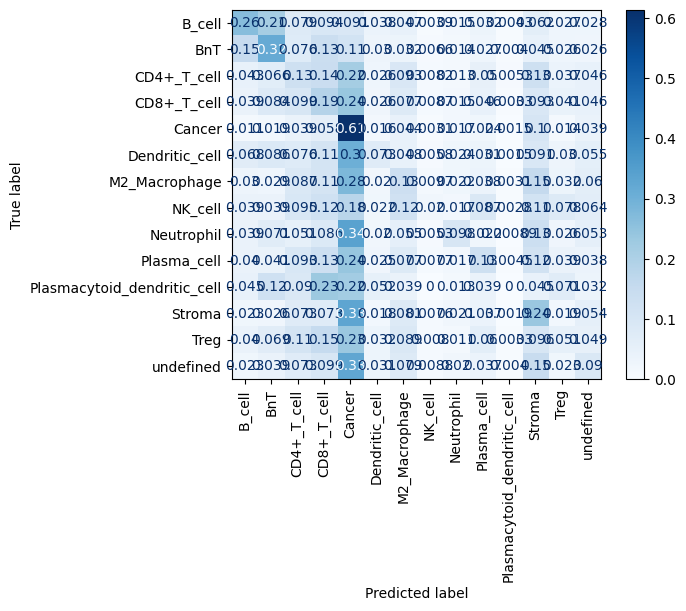

In [82]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(merged['cell_type'].unique()))
cmd.plot(cmap='Blues', xticks_rotation=90)

In [87]:
val['image_id'].iloc[0]

'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004'

In [92]:
df2 = val[val['image_id'] == 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004']

In [99]:
df2

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,13,0.502796,2,1,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.11130047589540482, 0.013668922707438469, 0....",CD4+_T_cell
1,1,0,0.565678,1,2,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.5656783580780029, 0.08513420820236206, 0.03...",BnT
2,2,12,0.499518,3,3,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00025761782308109105, 0.2238914668560028, 0...",CD8+_T_cell
3,3,12,0.410514,1,4,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0027973782271146774, 0.312889039516449, 0.0...",BnT
4,4,1,0.547875,1,5,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0005109531339257956, 0.5478748083114624, 0....",BnT
...,...,...,...,...,...,...,...,...
3638,3638,8,0.292363,11,3639,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.003406045027077198, 0.012605829164385796, 0...",Stroma
3639,3639,11,0.329026,3,3640,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00046532563283108175, 0.002209186088293791,...",CD8+_T_cell
3640,3640,3,0.421259,6,3641,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.01709270291030407, 0.009307235479354858, 0....",M2_Macrophage
3641,3641,12,0.550657,-1,3642,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.11950485408306122, 0.017337901517748833, 0....",NaN


In [116]:
df[df['sample_id'] == 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004']['cell_id']

149035       1
149036       2
149037       3
149038       4
149039       5
          ... 
152659    3638
152660    3639
152661    3640
152662    3641
152663    3642
Name: cell_id, Length: 3629, dtype: int64

In [117]:
df2[df2['label'] != -1]

,Unnamed: 0,pred,pred_prob,label,cell_id,image_id,prob_list,predicted_phenotype
0,0,13,0.502796,2,1,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.11130047589540482, 0.013668922707438469, 0....",CD4+_T_cell
1,1,0,0.565678,1,2,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.5656783580780029, 0.08513420820236206, 0.03...",BnT
2,2,12,0.499518,3,3,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00025761782308109105, 0.2238914668560028, 0...",CD8+_T_cell
3,3,12,0.410514,1,4,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0027973782271146774, 0.312889039516449, 0.0...",BnT
4,4,1,0.547875,1,5,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.0005109531339257956, 0.5478748083114624, 0....",BnT
...,...,...,...,...,...,...,...,...
3636,3636,9,0.454445,13,3637,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[2.6314122806070372e-05, 0.0026293881237506866...",undefined
3637,3637,11,0.339858,11,3638,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00444190576672554, 0.027384206652641296, 0....",Stroma
3638,3638,8,0.292363,11,3639,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.003406045027077198, 0.012605829164385796, 0...",Stroma
3639,3639,11,0.329026,3,3640,IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03...,"[0.00046532563283108175, 0.002209186088293791,...",CD8+_T_cell


In [108]:
df[df['sample_id'] == 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004']['cell_id']

149035       1
149036       2
149037       3
149038       4
149039       5
          ... 
152659    3638
152660    3639
152661    3640
152662    3641
152663    3642
Name: cell_id, Length: 3629, dtype: int64

In [115]:
df[(df['cell_id'] == 241) & (df['sample_id'] == 'IMMUcan_2022_WFLOW_10034294-GI-VAR-TIS-UNST-03_004')]

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type


# Lets check the array creation works as intended

In [ ]:
labels = np.load('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/cellsighter/IMMUcan/IMMUcan_Batch20220908_10087692-SPECT-VAR-TIS-01-IMC-01_004.npz')['data']

In [ ]:
len(labels)

In [ ]:
np.sum(labels == -1)

In [ ]:
df = pd.read_csv("/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv")

In [ ]:
df = df[df['sample_id'] == 'IMMUcan_Batch20220908_10087692-SPECT-VAR-TIS-01-IMC-01_004']
df

In [ ]:
labels = labels[labels != -1]

In [ ]:
df['check'] = labels

In [ ]:
df['check'] = df['check'].map(inv_mapping)
df

In [ ]:
print(classification_report(df['check'], df['cell_type'], zero_division=0))